<a href="https://colab.research.google.com/github/GarlicDebug/insurance-machine-learning-model/blob/master/insurance_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [0]:
import os
from six.moves import urllib

# URL for data file
DOWNLOAD_URL = "https://raw.githubusercontent.com/rlsummerscales/CPTR435/master/data/insurance.csv"
# local path where data file will be stored on computer (or in virtual environment)
INSURANCE_PATH = os.path.join("datasets", "insurance")

def fetch_insurance_data(insurance_url=DOWNLOAD_URL, insurance_path=INSURANCE_PATH):
    # create local directories for storing data files (if necessary)
    # NOTE: if running this in Colaboratory, these directories will not be
    # created on your computer, but in the virtual environment for the notebook
    # in colaboratory. It will only be available to this notebook, not others.
    if not os.path.isdir(insurance_path):
        os.makedirs(insurance_path)

    # build local path for data file
    csv_path = os.path.join(insurance_path, "insurance.csv")
    # download datafile if not already downloaded
    urllib.request.urlretrieve(insurance_url, csv_path)


In [0]:
fetch_insurance_data()

In [4]:
! ls datasets/insurance

insurance.csv


In [0]:
import pandas as pd

def load_insurance_data(insurance_path=INSURANCE_PATH):
    csv_path = os.path.join(insurance_path, "insurance.csv")
    return pd.read_csv(csv_path)

In [8]:
insurance = load_insurance_data()

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**Categorical Data Value Counts:**

In [10]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

There seems to be a pretty balanced distribution of samples based on region and sex, but not between smokers and non-smokers. Stratified splitting will be needed.

In [12]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


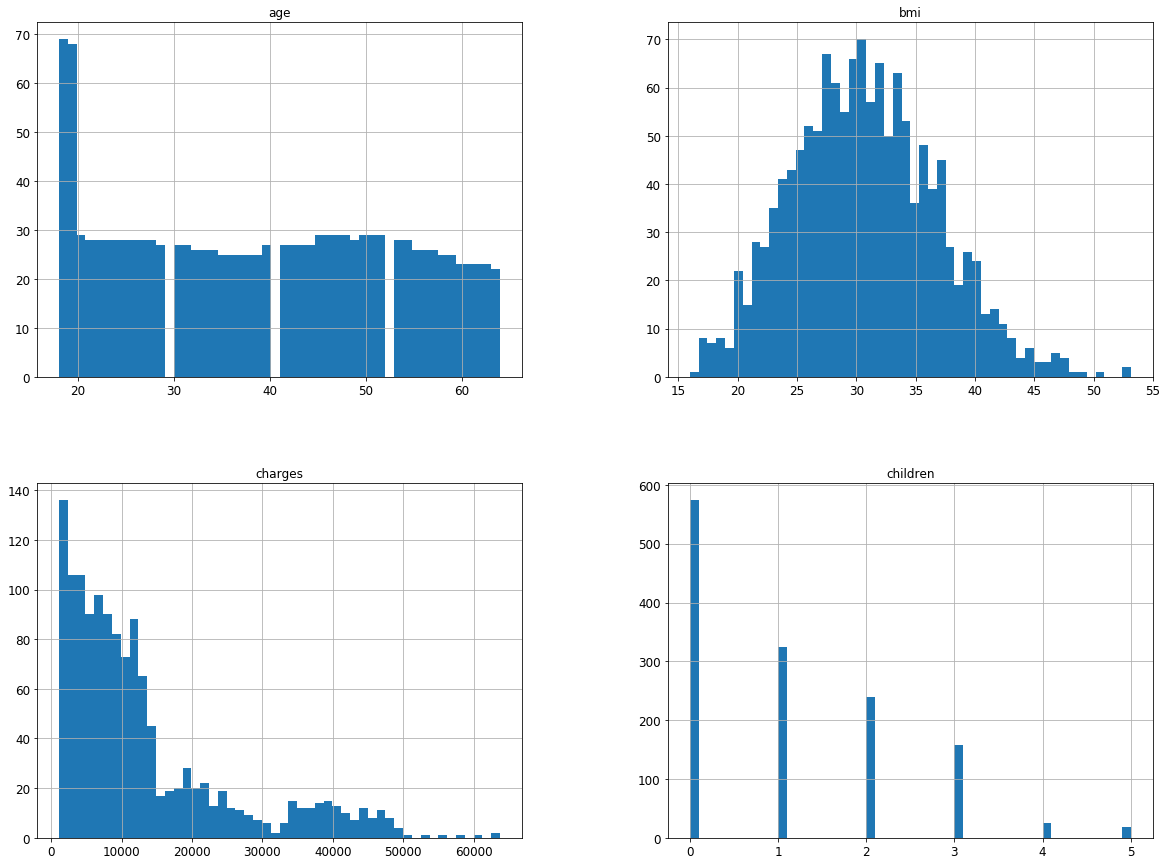

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=(20,15))

plt.show()